In [ ]:
%%HTML
<div class="h1" style="background-color: #FFFFFF; color: #470B63; padding: 20px; padding-center: 450px; font-size: 45px; max-width: 3500px; margin: auto; margin-top: 50px; display: flex; align-items: center; text-align: center; text-shadow: 1px 1px 1px #13A7AC;">
    <img src="https://logowik.com/content/uploads/images/premier-league-lion8499.jpg" alt="Image" width="300" style="float: left;">
    <span style="margin: auto; font-weight: bold";>Analysis of the Premier League season 2022-2023 </span>
    <img src="https://logowik.com/content/uploads/images/premier-league-lion8499.jpg" alt="Image" width="300" style="float: right;">
    </div>

# <span style="font-size:24px;">Table of Contents</span>

- ## [Goals](#section-1)
    - ### [Goals For](#goals-for)
    - ### [Goals Against](#goals-against)
    - ### [Goals Difference](#goals-difference)


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
# <img src="attachment:8a96ab60-1a54-4011-867d-1ffb57cfa0ff.png" alt="Image" width="1000" height="100">

In [ ]:
%%HTML
<style type="text/css">
div.h1 {background-color: #E1E2EF;color: #1964B8; padding: 20px;padding-center: 450px;font-size: 45px;max-width: 3500px;
    margin: auto;margin-top: 50px;text-align: center;text-shadow: 2px 2px 2px black;}

# conclusion

In [ ]:
d=pd.read_csv('/kaggle/input/premier-league-20222023-dataset/premier_league_df.csv')
d.head()


,home team,away team,FTHG,FTAG,htHG,htAG,home formation,away formation,home line up,away line up,...,away fouls,home corners,away corners,home throws,away throws,result,home_ht_ft,away_ht_ft,home_double_chance,away_double_chance
0,Crystal Palace,Arsenal,0,2,0,1,4-2-3-1,4-2-3-1,",Vicente Guaita,Nathaniel Clyne,Joachim Anders...",",Gabriel Jesus,Gabriel Martinelli,Martin Odega...",...,11,3,5,22,13,A,lost at ht and ft,won at ht and won at ft,didnt win either half,won both halves
1,Fulham,Liverpool,2,2,1,0,4-2-3-1,4-3-3,",Marek Rodak,Kenny Tete,Tosin Adarabioyo,Tim R...",",Luis Diaz,Roberto Firmino,Mohamed Salah,Thiag...",...,9,4,4,21,34,D,won at ht and drew at ft,lost at ht and drew ft,won either half,won either half
2,AFC Bournemouth,Aston Villa,2,0,1,0,4-2-3-1,4-3-1-2,",Mark Travers,Adam Smith,Lloyd Kelly,Chris Mep...",",Danny Ings,Leon Bailey,Philippe Coutinho,Jaco...",...,16,5,5,15,17,H,won at ht and won at ft,lost at ht and ft,won both halves,didnt win either half
3,Leeds United,Wolverhampton Wanderers,2,1,1,1,4-2-3-1,4-2-3-1,",Illan Meslier,Rasmus Kristensen,Robin Koch,Di...",",Hwang Hee-chan,Pedro Neto,Morgan Gibbs-White,...",...,9,6,4,15,24,H,drew at ht and won at ft,drew at ht and lost at ft,won either half,didnt win either half
4,Newcastle United,Nottingham Forest,2,0,0,0,4-3-3,5-3-2,",Nick Pope,Kieran Trippier,Fabian Schar,Dan Bu...",",Sam Surridge,Brennan Johnson,Jesse Lingard,Ja...",...,14,11,1,19,24,H,drew at ht and won at ft,drew at ht and lost at ft,won either half,didnt win either half


In [ ]:
d = d[['home team','away team','FTHG' ,'FTAG']]
df = d.copy()
#d.rename(columns={'FTHG': 'Full_time_Home_Goals'}, inplace=True)
#d.rename(columns={'FTAG': 'Full_time_Away_Goals'}, inplace=True)
df.rename(columns={'home team': 'team'}, inplace=True)
df.rename(columns={'FTHG': 'Goal_For'}, inplace=True)
df.rename(columns={'FTAG': 'Goal_Against'}, inplace=True)
mean_values = df.groupby('team').sum('Goal_For')
home= mean_values.sort_values('Goal_For', ascending=False)
home.head()

,Goal_For,Goal_Against
team,,
Manchester City,60,17
Arsenal,53,25
Liverpool,46,17
Brighton & Hove Albion,37,21
Tottenham Hotspur,37,25


In [ ]:
df2 = d.copy()
df2.rename(columns={'away team': 'team'}, inplace=True)
df2.rename(columns={'FTHG': 'Goal_Against'}, inplace=True)
df2.rename(columns={'FTAG': 'Goal_For'}, inplace=True)

cols = df2.columns.tolist()
idx_col1 = cols.index('Goal_Against')
idx_col2 = cols.index('Goal_For')
cols[idx_col1], cols[idx_col2] = cols[idx_col2], cols[idx_col1]
df2 = df2[cols]

mean_values = df2.groupby('team').sum('Goal_For')
away = mean_values.sort_values('Goal_For', ascending=False)
away.head()

,Goal_For,Goal_Against
team,,
Brighton & Hove Albion,35,32
Arsenal,35,18
Manchester City,34,16
Tottenham Hotspur,33,38
Newcastle United,32,19


In [ ]:
from IPython.display import display




In [ ]:
merged_df = pd.merge(home, away, on='team')
merged_df.columns = merged_df.columns.str.replace('_x', '_Home').str.replace('_y', '_away')
merged_df['Total_Goal_For'] = merged_df['Goal_For_Home'] + merged_df['Goal_For_away']
merged_df['Total_Goal_Against'] = merged_df['Goal_Against_Home'] + merged_df['Goal_Against_away']
merged_df['Goal Difference'] = merged_df['Total_Goal_For'] - merged_df['Total_Goal_Against']
merged_df = merged_df.reset_index()
merged_df

,team,Goal_For_Home,Goal_Against_Home,Goal_For_away,Goal_Against_away,Total_Goal_For,Total_Goal_Against,Goal Difference
0,Manchester City,60,17,34,16,94,33,61
1,Arsenal,53,25,35,18,88,43,45
2,Liverpool,46,17,29,30,75,47,28
3,Brighton & Hove Albion,37,21,35,32,72,53,19
4,Tottenham Hotspur,37,25,33,38,70,63,7
5,Manchester United,36,10,22,33,58,43,15
6,Newcastle United,36,14,32,19,68,33,35
7,Brentford,35,18,23,28,58,46,12
8,Aston Villa,33,21,18,25,51,46,5
9,Fulham,31,29,24,24,55,53,2


In [ ]:
# import pandas as pd
# from IPython.display import display, HTML

# # Define the styles for the teams
# cl_style = 'background-color: darkgreen; color: white; text-shadow: 3px 3px 3px black;'
# rel_style = 'background-color: darkred; color: white; text-shadow: 3px 3px 3px black;'

# # Apply the styles based on the team names
# def apply_team_style(value):
#     if value in cl:
#         return cl_style
#     elif value in relegate:
#         return rel_style
#     return ''

# # Apply the styles to the relevant columns
# styled_df = merged_df.style.applymap(apply_team_style, subset=['team']).set_caption('⚽ EPL Table Season 2021-2022 ⚽')

# # Convert the styled table to HTML and display it
# styled_html = t1.to_html()
# display(HTML(styled_html))


In [ ]:
team_colors = {
    'Manchester City': '#01D4D1',    'Arsenal': '#FA3737',    'Liverpool': '#D40108',    'Brighton & Hove Albion': '#0057B8',    'Tottenham Hotspur': '#132257',
    'Manchester United': '#FF5533',    'Newcastle United': '#241F20',    'Brentford': '#E20E0E',    'Aston Villa': '#92024A',    'Fulham': '#37010F',
    'Nottingham Forest': '#03F71D',    'West Ham United': '#7A263A',    'Leeds United': '#FFCD00',    'Leicester City': '#003090',    'Crystal Palace': '#1B458F',
    'AFC Bournemouth': '#660610',    'Chelsea': '#0408EE',    'Southampton': '#D71920',    'Wolverhampton Wanderers': '#EEDC04',    'Everton': '#003399'}


import matplotlib.pyplot as plt

def plot(merged_df , column_name):
    plt.figure(figsize=(10, 6))
    merged_df = merged_df.sort_values(by=column_name, ascending=False)
    plt.bar(merged_df['team'], merged_df[column_name], color=[team_colors.get(team, '#000000') for team in merged_df['team']])
    plt.axhspan(0, merged_df[column_name].max(), facecolor='lightgray', alpha=0.3)
    plt.title('Premier League  Season 22/23')
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel(column_name, fontsize=15)
    plt.show()

<a id="goals-for"></a>

<div class="h1">⚽ Goals For ⚽</div>

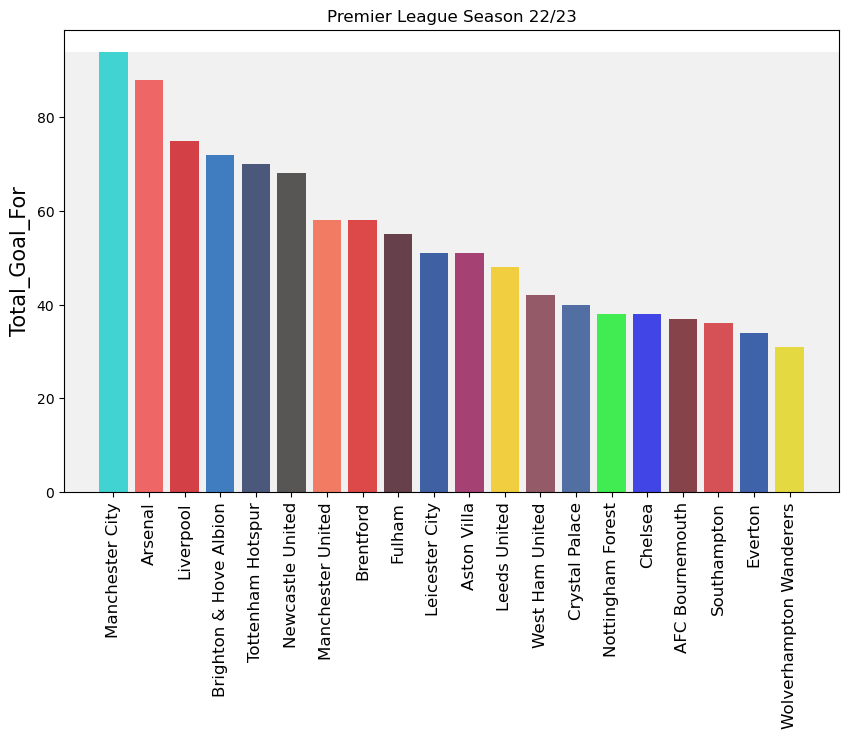

In [ ]:
plot(merged_df ,'Total_Goal_For')

<a id="goals-against"></a>
<div class=h1>⚽  Goals Against  ⚽ </div>

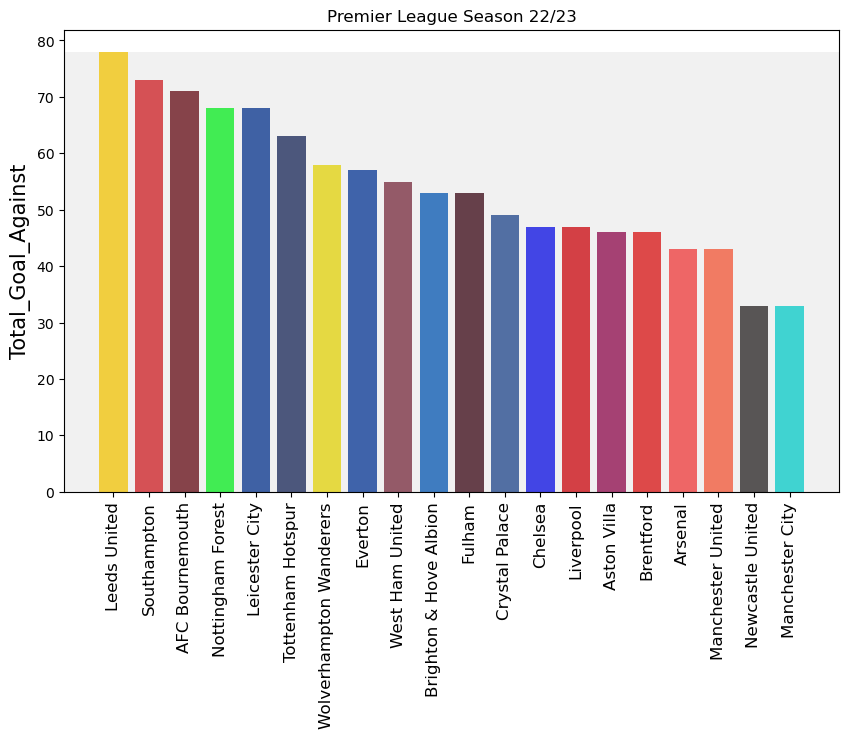

In [ ]:
plot(merged_df ,'Total_Goal_Against')

<a id="goals-difference"></a>
![](http://)<div class=h1>⚽ Goals Difference  ⚽ </div>

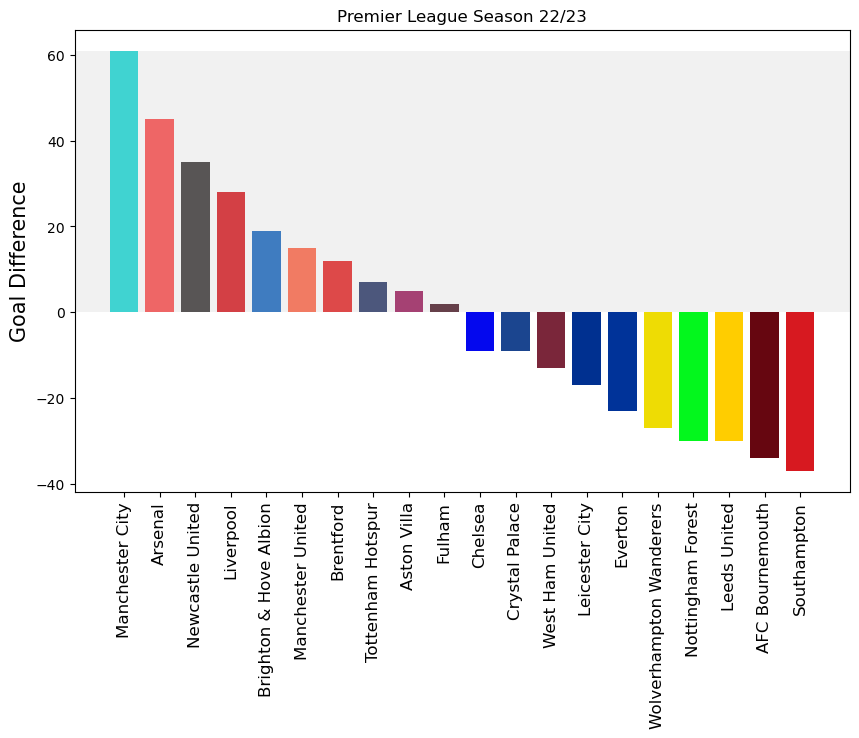

In [ ]:
plot(merged_df ,'Goal Difference')

<a id="goals-difference"></a>
![](http://)<div class=h1>⚽ Home and Away Goal For ⚽ </div>

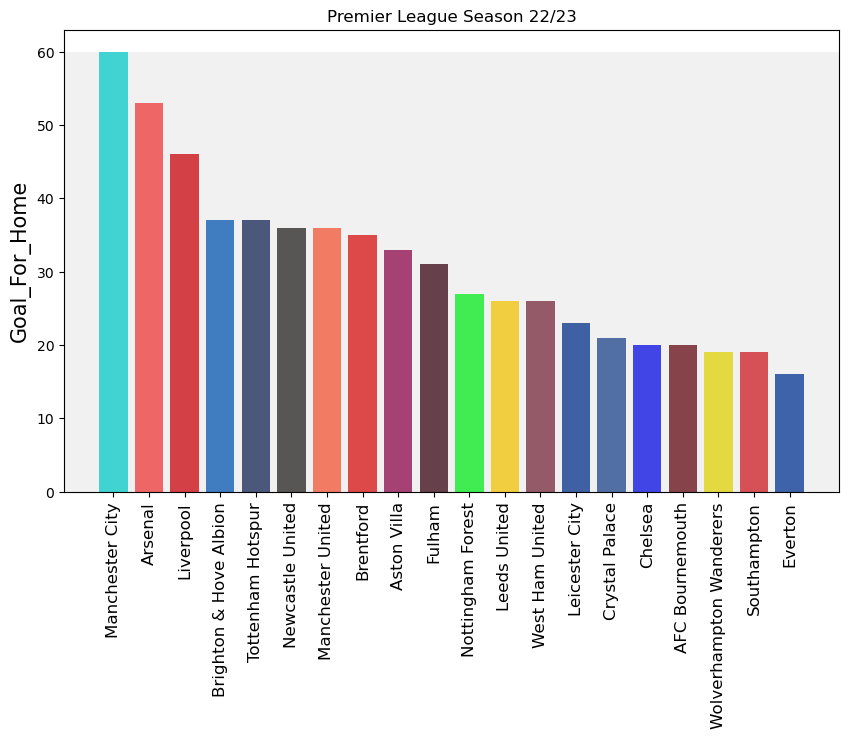

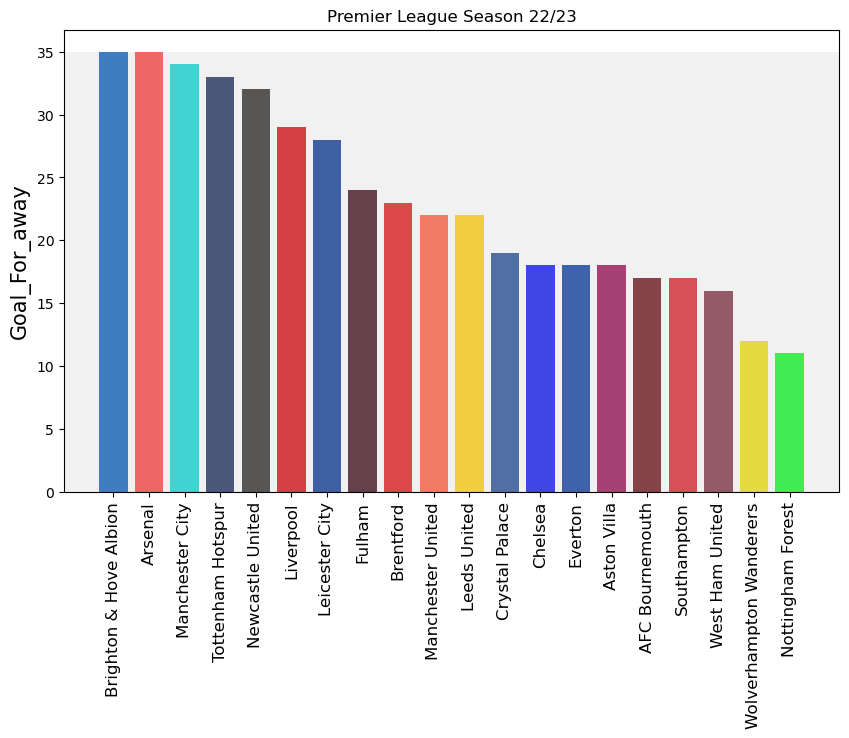

In [ ]:
plot(merged_df ,'Goal_For_Home')
plot(merged_df ,'Goal_For_away')
